In [1]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = GCNConv(dataset.num_node_features, 16)
        self.conv2 = GCNConv(16, dataset.num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)

        return F.log_softmax(x, dim=1)

## Cora

In [2]:
from torch_geometric.datasets import Planetoid
dataset = Planetoid(root='./dataset/Cora', name='Cora')

In [3]:
print(dataset)

Cora()


train

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Net().to(device)
data = dataset[0].to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

filename = 'LossAndAccuracy/GCN_Cora.txt'

model.train()
for epoch in range(2000):
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()

    model.eval()
    _, pred = model(data).max(dim=1)
    correct = float(pred[data.test_mask].eq(data.y[data.test_mask]).sum().item())
    acc = correct / data.test_mask.sum().item()

    with open(filename,'a') as f: # 'a'表示append,即在原来文件内容后继续写数据（不清楚原有数据）
        f.write('{:02d} {:.4f} {:.4f}\n'.format(epoch, loss, acc))

test

In [5]:
model.eval()
_, pred = model(data).max(dim=1)
correct = float(pred[data.test_mask].eq(data.y[data.test_mask]).sum().item())
acc = correct / data.test_mask.sum().item()
print('Accuracy: {:.4f}'.format(acc))

Accuracy: 0.8070


#### 绘制曲线

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
data_cora =np.loadtxt("LossAndAccuracy/GCN_Cora.txt")

x = data_cora[:,0] # epoch
y1 = data_cora[:,1] # loss
y2 = data_cora[:,2] # accuracy

Text(0.5, 1.0, 'loss for training GCN on cora')

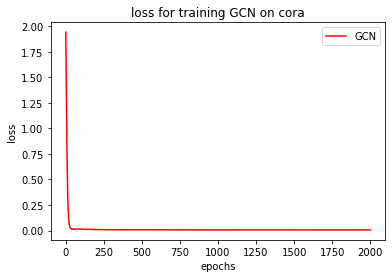

In [7]:
# 画出整体的loss曲线

p2 = pl.plot(x, y1,'r-', label = u'GCN')
pl.legend()
#显示图例
pl.xlabel(u'epochs')
pl.ylabel(u'loss')
plt.title('loss for training GCN on cora')

Text(0.5, 1.0, 'accuracy for training GCN on cora')

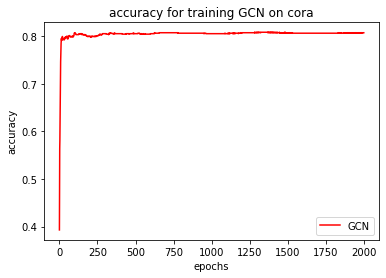

In [8]:
# 画出整体的accuracy曲线

p2 = pl.plot(x, y2,'r-', label = u'GCN')
pl.legend()
#显示图例
pl.xlabel(u'epochs')
pl.ylabel(u'accuracy')
plt.title('accuracy for training GCN on cora')

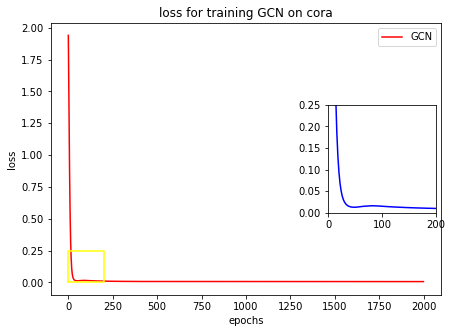

In [9]:
fig1 = plt.figure(figsize = (7,5)) # figsize是图片的大小`
ax1 = fig1.add_subplot(1, 1, 1) # ax1是子图的名字`

# 画出整体的loss曲线
p2 = pl.plot(x, y1,'r-', label = u'GCN')
pl.legend()
#显示图例
pl.xlabel(u'epochs')
pl.ylabel(u'loss')
plt.title('loss for training GCN on cora')

# 显示放大的部分曲线
tx0 = 0
tx1 = 200
ty0 = 0.000
ty1 = 0.25
sx = [tx0,tx1,tx1,tx0,tx0]
sy = [ty0,ty0,ty1,ty1,ty0]
pl.plot(sx,sy,"yellow")
axins = inset_axes(ax1, width=1.5, height=1.5, loc='right')

axins.plot(x,y1, color='blue', ls='-')
axins.axis([0, 200, 0.000, 0.25])
plt.savefig("graphs/GCN_cora_loss.png")
pl.show()

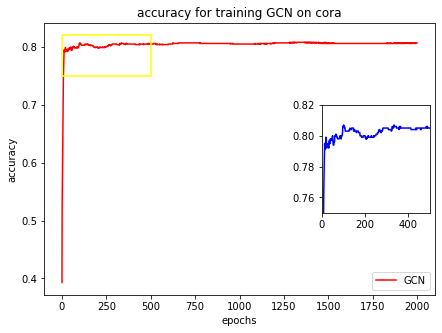

In [10]:
fig1 = plt.figure(figsize = (7,5)) # figsize是图片的大小`
ax1 = fig1.add_subplot(1, 1, 1) # ax1是子图的名字`

# 画出整体的loss曲线

p2 = pl.plot(x, y2,'r-', label = u'GCN')
pl.legend()
#显示图例
pl.xlabel(u'epochs')
pl.ylabel(u'accuracy')
plt.title('accuracy for training GCN on cora')

# 显示放大的部分曲线
tx0 = 0
tx1 = 500
#设置想放大区域的横坐标范围
ty0 = 0.75
ty1 = 0.82
#设置想放大区域的纵坐标范围
sx = [tx0,tx1,tx1,tx0,tx0]
sy = [ty0,ty0,ty1,ty1,ty0]
pl.plot(sx,sy,"yellow")
axins = inset_axes(ax1, width=1.5, height=1.5, loc='right')

axins.plot(x,y2, color='blue', ls='-')
axins.axis([0, 500, 0.75, 0.82])
plt.savefig("graphs/GCN_cora_accuracy.png")
pl.show()

model's details

In [11]:
# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

Model's state_dict:
conv1.weight 	 torch.Size([1433, 16])
conv1.bias 	 torch.Size([16])
conv2.weight 	 torch.Size([16, 7])
conv2.bias 	 torch.Size([7])
Optimizer's state_dict:
state 	 {1609794401848: {'step': 2000, 'exp_avg': tensor([[ 1.1677e-08, -3.1435e-08,  6.8708e-09,  ...,  3.1559e-08,
         -1.7289e-08, -2.4279e-09],
        [ 5.4110e-07,  3.8208e-08,  2.7009e-08,  ...,  4.9880e-07,
         -1.1448e-08, -8.1730e-10],
        [-1.8160e-07,  8.2181e-07,  1.0848e-07,  ..., -1.2290e-07,
         -4.2758e-08, -2.0138e-07],
        ...,
        [ 2.2337e-08, -1.0298e-06, -4.2713e-08,  ..., -2.3235e-08,
         -6.5634e-07, -7.4976e-09],
        [-1.8610e-08,  1.7828e-07,  1.9432e-07,  ...,  3.6595e-09,
          1.2242e-06, -1.7205e-07],
        [-2.3335e-08,  3.0651e-07,  9.5349e-08,  ...,  4.1163e-09,
         -2.1834e-07,  1.4563e-09]], device='cuda:0'), 'exp_avg_sq': tensor([[6.0649e-11, 1.2844e-10, 1.6197e-10,  ..., 5.8051e-11, 3.3059e-10,
         7.2229e-11],
        [4.26

save model

In [12]:
torch.save(model.state_dict(), "GCNcora.pkl")

## Citeseer

In [14]:
dataset = Planetoid(root='./dataset/Citeseer', name='CiteSeer')

In [15]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Net().to(device)
data = dataset[0].to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

filename = 'LossAndAccuracy/GCN_Citeseer.txt'

model.train()
for epoch in range(2000):
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()

    model.eval()
    _, pred = model(data).max(dim=1)
    correct = float(pred[data.test_mask].eq(data.y[data.test_mask]).sum().item())
    acc = correct / data.test_mask.sum().item()

    with open(filename,'a') as f: # 'a'表示append,即在原来文件内容后继续写数据（不清楚原有数据）
        f.write('{:02d} {:.4f} {:.4f}\n'.format(epoch, loss, acc))

In [16]:
model.eval()
_, pred = model(data).max(dim=1)
correct = float(pred[data.test_mask].eq(data.y[data.test_mask]).sum().item())
acc = correct / data.test_mask.sum().item()
print('Accuracy: {:.4f}'.format(acc))

Accuracy: 0.6890


#### 绘制曲线

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
data_cora =np.loadtxt("LossAndAccuracy/GCN_Citeseer.txt")

x = data_cora[:,0] # epoch
y1 = data_cora[:,1] # loss
y2 = data_cora[:,2] # accuracy

Text(0.5, 1.0, 'loss for training GCN on citeseer')

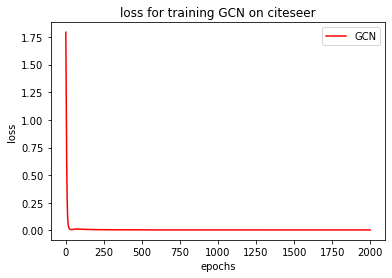

In [20]:
# 画出整体的loss曲线

p2 = pl.plot(x, y1,'r-', label = u'GCN')
pl.legend()
#显示图例
pl.xlabel(u'epochs')
pl.ylabel(u'loss')
plt.title('loss for training GCN on citeseer')

Text(0.5, 1.0, 'accuracy for training GCN on citeseer')

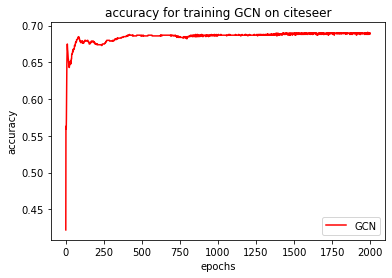

In [21]:
# 画出整体的accuracy曲线

p2 = pl.plot(x, y2,'r-', label = u'GCN')
pl.legend()
#显示图例
pl.xlabel(u'epochs')
pl.ylabel(u'accuracy')
plt.title('accuracy for training GCN on citeseer')

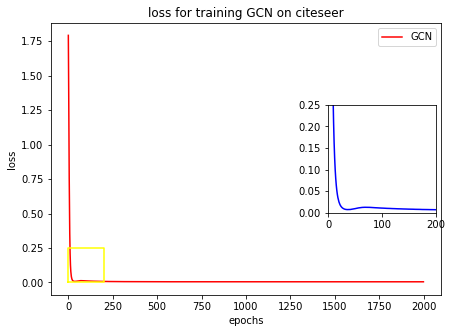

In [22]:
fig1 = plt.figure(figsize = (7,5)) # figsize是图片的大小`
ax1 = fig1.add_subplot(1, 1, 1) # ax1是子图的名字`

# 画出整体的loss曲线
p2 = pl.plot(x, y1,'r-', label = u'GCN')
pl.legend()
#显示图例
pl.xlabel(u'epochs')
pl.ylabel(u'loss')
plt.title('loss for training GCN on citeseer')

# 显示放大的部分曲线
tx0 = 0
tx1 = 200
ty0 = 0.000
ty1 = 0.25
sx = [tx0,tx1,tx1,tx0,tx0]
sy = [ty0,ty0,ty1,ty1,ty0]
pl.plot(sx,sy,"yellow")
axins = inset_axes(ax1, width=1.5, height=1.5, loc='right')

axins.plot(x,y1, color='blue', ls='-')
axins.axis([0, 200, 0.000, 0.25])
plt.savefig("graphs/GCN_citeseer_loss.png")
pl.show()

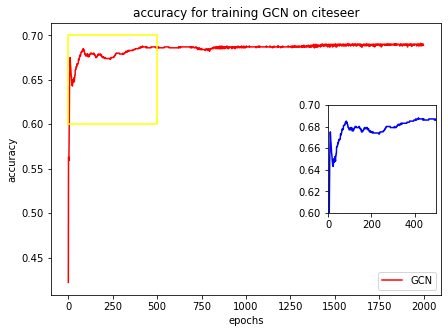

In [23]:
fig1 = plt.figure(figsize = (7,5)) # figsize是图片的大小`
ax1 = fig1.add_subplot(1, 1, 1) # ax1是子图的名字`

# 画出整体的loss曲线

p2 = pl.plot(x, y2,'r-', label = u'GCN')
pl.legend()
#显示图例
pl.xlabel(u'epochs')
pl.ylabel(u'accuracy')
plt.title('accuracy for training GCN on citeseer')

# 显示放大的部分曲线
tx0 = 0
tx1 = 500
#设置想放大区域的横坐标范围
ty0 = 0.60
ty1 = 0.70
#设置想放大区域的纵坐标范围
sx = [tx0,tx1,tx1,tx0,tx0]
sy = [ty0,ty0,ty1,ty1,ty0]
pl.plot(sx,sy,"yellow")
axins = inset_axes(ax1, width=1.5, height=1.5, loc='right')

axins.plot(x,y2, color='blue', ls='-')
axins.axis([0, 500, 0.60, 0.70])
plt.savefig("graphs/GCN_citeseer_accuracy.png")
pl.show()

model's details

In [24]:
# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

Model's state_dict:
conv1.weight 	 torch.Size([3703, 16])
conv1.bias 	 torch.Size([16])
conv2.weight 	 torch.Size([16, 6])
conv2.bias 	 torch.Size([6])
Optimizer's state_dict:
state 	 {1609362200520: {'step': 2000, 'exp_avg': tensor([[-3.0288e-07, -2.3650e-07, -5.6546e-07,  ..., -4.4120e-08,
         -1.9610e-07,  1.1439e-06],
        [-1.0202e-07,  6.0247e-07, -8.5655e-08,  ..., -1.6608e-07,
          3.9486e-07,  2.8966e-07],
        [ 1.9428e-09,  3.1378e-08, -1.1596e-08,  ...,  6.0680e-09,
         -1.1319e-08, -1.1797e-08],
        ...,
        [-2.2824e-08,  3.3603e-08,  3.2765e-08,  ...,  1.6853e-10,
         -1.3955e-08,  3.3606e-08],
        [ 0.0000e+00, -4.8956e-20,  4.2039e-45,  ..., -1.9740e-14,
         -2.8026e-45, -1.4013e-45],
        [ 2.0398e-08, -1.5823e-08, -1.1785e-08,  ..., -2.0368e-08,
          6.8107e-09,  1.8195e-08]], device='cuda:0'), 'exp_avg_sq': tensor([[5.3241e-10, 7.0959e-10, 3.1980e-10,  ..., 1.7938e-09, 5.7017e-10,
         9.9673e-10],
        [1.06

save model

In [25]:
torch.save(model.state_dict(),'GCNciteseer.pkl')

## Pubmed

In [26]:
from torch_geometric.datasets import Planetoid
dataset = Planetoid(root='./dataset/Pubmed', name='Pubmed')

In [27]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Net().to(device)
data = dataset[0].to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

filename = 'LossAndAccuracy/GCN_Pubmed.txt'

model.train()
for epoch in range(2000):
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()

    model.eval()
    _, pred = model(data).max(dim=1)
    correct = float(pred[data.test_mask].eq(data.y[data.test_mask]).sum().item())
    acc = correct / data.test_mask.sum().item()

    with open(filename,'a') as f: # 'a'表示append,即在原来文件内容后继续写数据（不清楚原有数据）
        f.write('{:02d} {:.4f} {:.4f}\n'.format(epoch, loss, acc))

In [28]:
model.eval()
_, pred = model(data).max(dim=1)
correct = float(pred[data.test_mask].eq(data.y[data.test_mask]).sum().item())
acc = correct / data.test_mask.sum().item()
print('Accuracy: {:.4f}'.format(acc))

Accuracy: 0.7840


#### 绘制曲线

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
data_cora =np.loadtxt("LossAndAccuracy/GCN_Pubmed.txt")

x = data_cora[:,0] # epoch
y1 = data_cora[:,1] # loss
y2 = data_cora[:,2] # accuracy

Text(0.5, 1.0, 'loss for training GCN on pubmed')

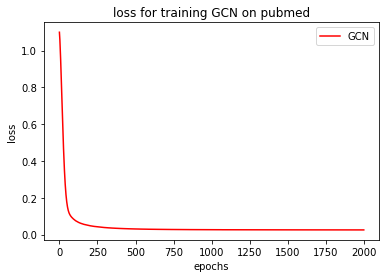

In [32]:
# 画出整体的loss曲线

p2 = pl.plot(x, y1,'r-', label = u'GCN')
pl.legend()
#显示图例
pl.xlabel(u'epochs')
pl.ylabel(u'loss')
plt.title('loss for training GCN on pubmed')

Text(0.5, 1.0, 'accuracy for training GCN on pubmed')

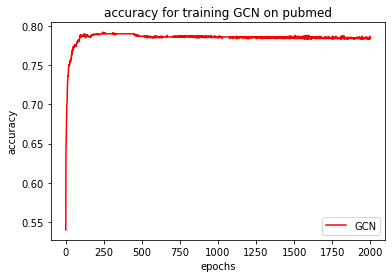

In [33]:
# 画出整体的accuracy曲线

p2 = pl.plot(x, y2,'r-', label = u'GCN')
pl.legend()
#显示图例
pl.xlabel(u'epochs')
pl.ylabel(u'accuracy')
plt.title('accuracy for training GCN on pubmed')

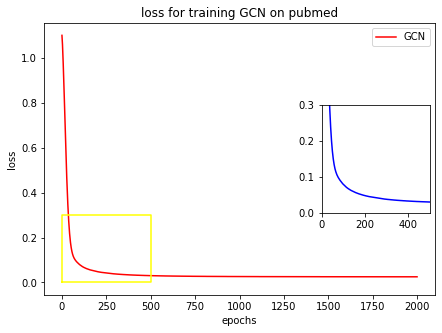

In [34]:
fig1 = plt.figure(figsize = (7,5)) # figsize是图片的大小`
ax1 = fig1.add_subplot(1, 1, 1) # ax1是子图的名字`

# 画出整体的loss曲线
p2 = pl.plot(x, y1,'r-', label = u'GCN')
pl.legend()
#显示图例
pl.xlabel(u'epochs')
pl.ylabel(u'loss')
plt.title('loss for training GCN on pubmed')

# 显示放大的部分曲线
tx0 = 0
tx1 = 500
ty0 = 0.000
ty1 = 0.30
sx = [tx0,tx1,tx1,tx0,tx0]
sy = [ty0,ty0,ty1,ty1,ty0]
pl.plot(sx,sy,"yellow")
axins = inset_axes(ax1, width=1.5, height=1.5, loc='right')

axins.plot(x,y1, color='blue', ls='-')
axins.axis([0, 500, 0.000, 0.30])
plt.savefig("graphs/GCN_pubmed_loss.png")
pl.show()

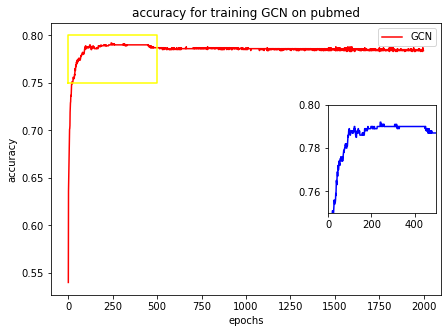

In [35]:
fig1 = plt.figure(figsize = (7,5)) # figsize是图片的大小`
ax1 = fig1.add_subplot(1, 1, 1) # ax1是子图的名字`

# 画出整体的loss曲线

p2 = pl.plot(x, y2,'r-', label = u'GCN')
pl.legend()
#显示图例
pl.xlabel(u'epochs')
pl.ylabel(u'accuracy')
plt.title('accuracy for training GCN on pubmed')

# 显示放大的部分曲线
tx0 = 0
tx1 = 500
#设置想放大区域的横坐标范围
ty0 = 0.75
ty1 = 0.80
#设置想放大区域的纵坐标范围
sx = [tx0,tx1,tx1,tx0,tx0]
sy = [ty0,ty0,ty1,ty1,ty0]
pl.plot(sx,sy,"yellow")
axins = inset_axes(ax1, width=1.5, height=1.5, loc='right')

axins.plot(x,y2, color='blue', ls='-')
axins.axis([0, 500, 0.75, 0.80])
plt.savefig("graphs/GCN_pubmed_accuracy.png")
pl.show()

Model's Details

In [36]:
# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

Model's state_dict:
conv1.weight 	 torch.Size([500, 16])
conv1.bias 	 torch.Size([16])
conv2.weight 	 torch.Size([16, 3])
conv2.bias 	 torch.Size([3])
Optimizer's state_dict:
state 	 {1609413456584: {'step': 2000, 'exp_avg': tensor([[ 2.8319e-07, -2.2488e-06, -5.6055e-06,  ..., -2.5871e-06,
         -8.3520e-06, -2.8786e-06],
        [ 3.4137e-07, -1.6600e-07, -5.4560e-08,  ..., -2.0505e-07,
          5.2325e-08, -1.3546e-07],
        [ 6.8820e-07, -3.7248e-07, -9.3858e-08,  ..., -5.4231e-07,
         -2.4316e-07, -3.5724e-07],
        ...,
        [ 4.9145e-07, -5.4065e-07, -3.1966e-07,  ..., -5.6890e-07,
         -1.2739e-07, -4.3160e-07],
        [ 6.1699e-07, -5.5761e-07, -2.6563e-07,  ..., -5.9700e-07,
          3.0663e-08, -5.6275e-07],
        [ 4.4988e-07, -3.5280e-07, -1.3701e-07,  ..., -3.8060e-07,
          5.1035e-08, -3.5147e-07]], device='cuda:0'), 'exp_avg_sq': tensor([[1.2821e-08, 2.9002e-08, 1.4671e-07,  ..., 1.5226e-08, 2.5213e-08,
         8.0130e-08],
        [6.152

In [37]:
torch.save(model.state_dict(),'GCNpubmed.pkl')